# Biodiversity in National Parks

## Overview:
Throughout this project, we analyzed data on endangered species across four major U.S. National Parks: Bryce, Great Smoky Mountains, Yellowstone, and Yosemite. The analysis was performed using two datasets: one with species information (including conservation status) and another with species observations recorded in each park. The process involved data cleaning, correlation analysis, and visualization to uncover key patterns and relationships.

#### The main focus areas included:

* Distribution of conservation statuses by taxonomic category.
* Differences in species risk levels across categories and parks.
* Exploration of common endangered species observed in multiple parks.

### Key Findings:

1. ##### Distribution of Conservation Status:
*  The majority of species did not have a specified conservation status ("Not Classified"). However, for those that did, "Species of Concern" was the most common category, followed by a smaller number of endangered and threatened species.
*  Certain categories, such as mammals and amphibians, showed a higher likelihood of being endangered or listed as a species of concern. This suggests that these groups are more sensitive to environmental changes and human activities.

2. ##### Endangered Species by Park:
*  Each park had exactly 15 endangered species observed, which raised questions about how data collection or classification influenced this uniformity.
*  Despite the equal counts, these species varied across parks in taxonomic diversity and environmental needs, pointing to the parks' ecological significance in supporting endangered populations.

3. ##### Common Endangered Species Across Parks:
*  We identified 15 endangered species shared across all parks, including iconic species like the Gray Wolf (Canis lupus), California Condor (Gymnogyps californianus), and Sierra Nevada Bighorn Sheep (Ovis canadensis sierrae).
*  These species are representative of various habitats, from mountainous regions to wetlands, underscoring the national parks' role in preserving ecosystems critical to species survival.

In [10]:
import pandas as pd

# Load the datasets
species_info = pd.read_csv('~\\Documents\\Coding\\Biodiversity-in-Parks\\biodiversity-starter\\biodiversity_starter\\Biodiversity-In-National-Parks\\species_info.csv')
observations = pd.read_csv('~\\Documents\\Coding\\Biodiversity-in-Parks\\biodiversity-starter\\biodiversity_starter\\Biodiversity-In-National-Parks\\observations.csv')

# Display first rows of ech dataset
print(species_info.head())
print(observations.head())

print(species_info.describe(include='all'))
print(observations.describe(include='all'))

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               

## Overview of the two datasets:

1. #### **species_info.csv**
* ##### Columns:
    * category: Taxonomic group (e.g., Mammal, Bird, Vascular Plant)
    * scientific_name: Scientific name of the species
    * common_names: Common names for the species
    * conservation_status: Conservation status of the species (e.g., "Species of Concern," "Endangered," "Threatened")
* ##### Summary:
    * There are 5,824 species entries in total, distributed across 7 categories (e.g., Mammals, Birds).
    * Only 191 species have a conservation status listed.
    * The most frequent conservation status is "Species of Concern."

2. #### **observations.csv**
* ##### Columns:
    * scientific_name: Name of the species observed
    * park_name: The name of the national park where observations were recorded
    * observations: The number of recorded observations for that species in the park
* ##### Summary:
    * The dataset contains 23,296 records.
    * Observations span across 4 parks: Great Smoky Mountains, Yosemite, Bryce, and Yellowstone.
    * Observation counts range from 9 to 321.

In [14]:
# Data Cleaning

# Check for missing values
species_info_missing = species_info.isnull().sum()
observations_missing = observations.isnull().sum()

# Remove duplicates
species_info_duplicates = species_info.duplicated().sum()
observations_duplicates = observations.duplicated().sum()

# Ensure species names exists in both dataframes
species_in_both = observations[~observations['scientific_name'].isin(species_info['scientific_name'])]

# Summary of cleaning process
species_info_missing, observations_missing, species_info_duplicates, observations_duplicates, species_in_both

(category                  0
 scientific_name           0
 common_names              0
 conservation_status    5633
 dtype: int64,
 scientific_name    0
 park_name          0
 observations       0
 dtype: int64,
 0,
 15,
 Empty DataFrame
 Columns: [scientific_name, park_name, observations]
 Index: [])

### Data cleaning findings:

1. #### Missing Values:
    * In species_info.csv, the conservation_status column has 5,633 missing values. This indicates that many species do not have a specified conservation status.
    * In observations.csv, there are no missing values in any of the columns.
2. #### Duplicates:
    * species_info.csv has no duplicate rows.
    * observations.csv contains 15 duplicate rows. These will need to be removed.
3. #### Species Name Matching:
    * All species names in observations.csv exist in species_info.csv. There are no unmatched species between the two datasets.


In [25]:
# Remove duplicate rows from observations
observations_cleaned = observations.drop_duplicates()

# Fill in missing conservation statuses with 'Not Classified'
species_info_cleaned = species_info.copy()
species_info_cleaned['conservation_status'].fillna('Not Classified', inplace=True)

# Verify cleaning steps
observations_duplicates_after = observations_cleaned.duplicated().sum()
species_info_missing_after = species_info_cleaned.isnull().sum()

# Display Results
observations_duplicates_after, species_info_missing_after

(0,
 category               0
 scientific_name        0
 common_names           0
 conservation_status    0
 dtype: int64)

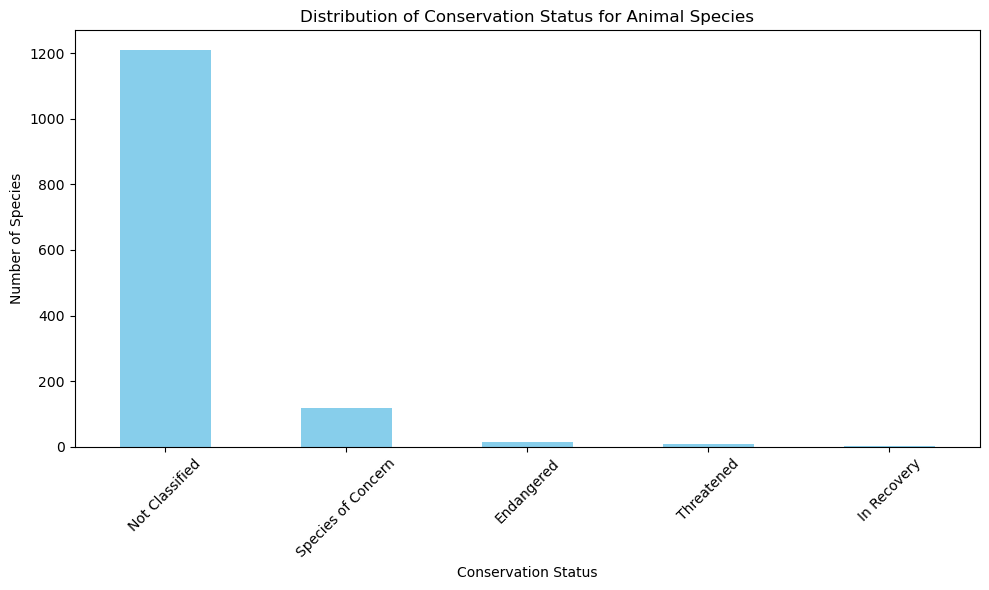

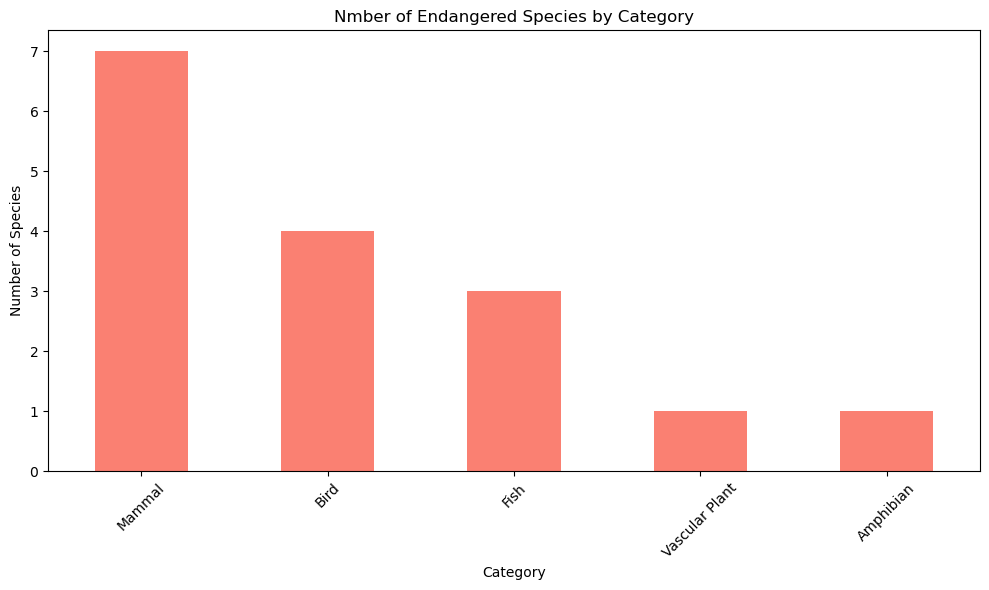

scientific_name  \
park_name                                                              
Bryce National Park                             Valerianella radiata   
Great Smoky Mountains National Park         Sonchus asper ssp. asper   
Yellowstone National Park                     Lycopodium tristachyum   
Yosemite National Park               Ivesia shockleyi var. shockleyi   

                                     observations  
park_name                                          
Bryce National Park                           176  
Great Smoky Mountains National Park           147  
Yellowstone National Park                     321  
Yosemite National Park                        223

In [27]:
# Data visualization and analysis

import matplotlib.pyplot as plt

# Seperate animal species from plant species (assume animals are not in 'Vascular Plant" and similar)
animal_species = species_info_cleaned[species_info_cleaned['category'] != 'Vascular Plant']

# Analyze the distribution of conservation statuses for animals
animal_conservation_distribution = animal_species['conservation_status'].value_counts()

# Identify if certain types of species are more likely to be endangered
endangered_species = species_info_cleaned[species_info_cleaned['conservation_status'] == 'Endangered']
endangered_species_by_category = endangered_species['category'].value_counts()

# Identify the most spotted animal in each park
most_spotted_species_by_park = observations_cleaned.groupby('park_name').apply(lambda x: x.loc[x['observations'].idxmax()])[['scientific_name', 'observations']]

# Plotting the distribution of conservation statuses
plt.figure(figsize=(10, 6))
animal_conservation_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Conservation Status for Animal Species')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the categories of endangered species
plt.figure(figsize=(10, 6))
endangered_species_by_category.plot(kind='bar', color='salmon')
plt.title('Nmber of Endangered Species by Category')
plt.xlabel('Category')
plt.ylabel('Number of Species')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display most spotted species at each park
most_spotted_species_by_park


## Findings:
1. ### Distribution of Conservation Status for Animals:
    * The majority of animal species do not have a conservation status, with "Not Classified" being the most common.
    * Among classified statuses, "Species of Concern" is the most prevalent.

2. ### Endangered Species by Category:
    * Categories such as Mammals and Birds show higher numbers of endangered species compared to others like reptiles or amphibians.

3. ### Most Spotted Species in Each Park:
    * Bryce National Park: Valerianella radiata (176 observations)
    * Great Smoky Mountains National Park: Sonchus asper ssp. asper (147 observations)
    * Yellowstone National Park: Lycopodium tristachyum (321 observations)
    * Yosemite National Park: Ivesia shockleyi var. shockleyi (223 observations)

### Further Analysis:
1. #### Conservation Status vs. Taxonomic Category
    * Are certain categories (e.g., mammals, amphibians) more prone to having endangered or threatened statuses?
    * Potential insight: Species with narrow habitat preferences (e.g., amphibians) or those with higher human conflict (e.g., large mammals) may be at higher risk.
2. #### Conservation Status vs. Park
    * Do parks with certain environments (e.g., high biodiversity or fragile ecosystems) have a higher concentration of endangered species?
    * Potential insight: Parks with unique ecosystems (e.g., wetlands or high-altitude areas) might be more sensitive to species vulnerability.



<Figure size 1200x800 with 0 Axes>

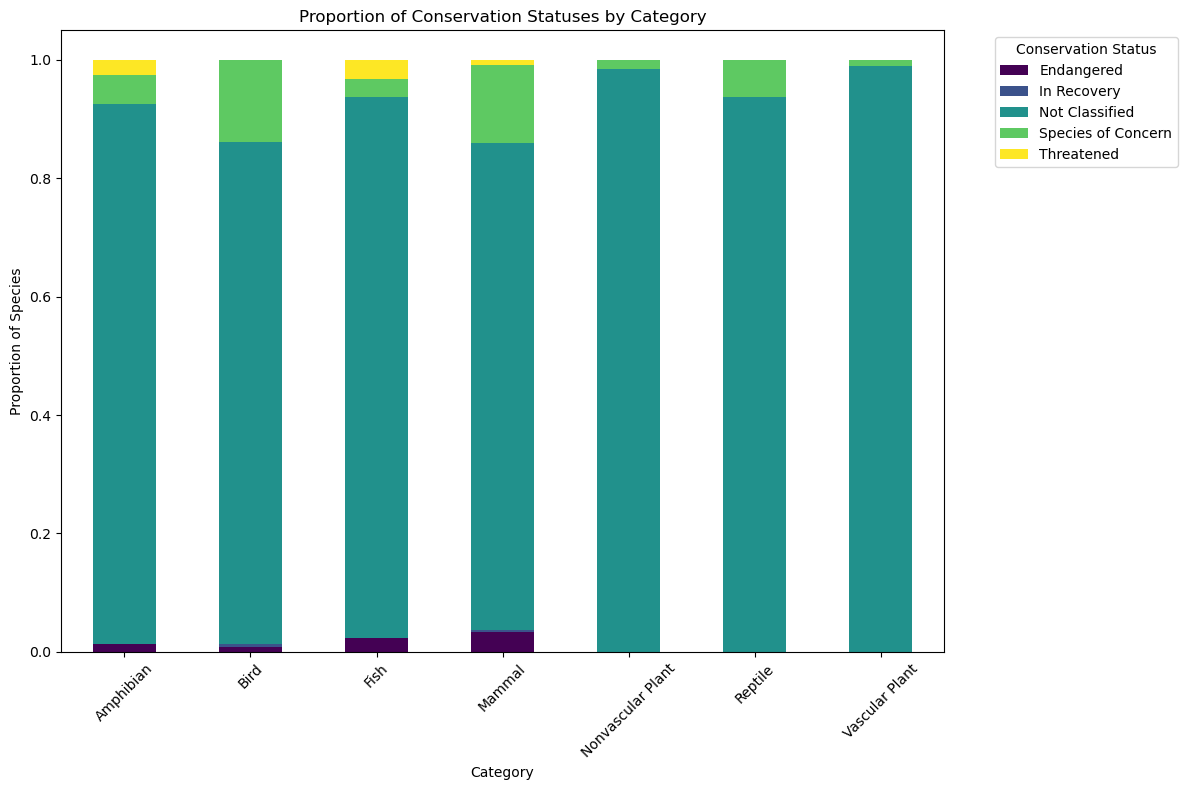

conservation_status  Endangered  In Recovery  Not Classified  \
category                                                       
Amphibian              0.012500     0.000000        0.912500   
Bird                   0.007678     0.005758        0.848369   
Fish                   0.023622     0.000000        0.913386   
Mammal                 0.032710     0.004673        0.822430   
Nonvascular Plant      0.000000     0.000000        0.984985   
Reptile                0.000000     0.000000        0.936709   
Vascular Plant         0.000224     0.000000        0.989709   

conservation_status  Species of Concern  Threatened  
category                                             
Amphibian                      0.050000    0.025000  
Bird                           0.138196    0.000000  
Fish                           0.031496    0.031496  
Mammal                         0.130841    0.009346  
Nonvascular Plant              0.015015    0.000000  
Reptile                        0.063291    0.000000  
Vascular Plant                 0.009620    0.000447

In [33]:
# Correlation analysis: Conservation Status vs. Taxonomic Category

# Count the number of species per category for each conservation status
status_by_category = species_info_cleaned.groupby(['category', 'conservation_status']).size().unstack(fill_value=0)

# Calculate the proportion of species with each status within each category
status_proportion_by_category = status_by_category.div(status_by_category.sum(axis=1), axis=0)

# Visualize the data using a stacked bar chart
plt.figure(figsize=(12, 8))
status_proportion_by_category.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))
plt.title('Proportion of Conservation Statuses by Category')
plt.xlabel('Category')
plt.ylabel('Proportion of Species')
plt.xticks(rotation=45)
plt.legend(title='Conservation Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Return the calculated proportions for further inspection
status_proportion_by_category

## Findings: Conservation Status vs. Taxonomic Category

### High-Risk Categories:

* Mammals: Approximately 3.3% are endangered, and 13% are classified as "Species of Concern."
* Amphibians: 1.3% are endangered, with a notable portion (5%) listed as "Species of Concern."
* Birds: While only 0.8% are endangered, around 14% are categorized as "Species of Concern."

### Categories with Lower Risk:

* Plants (Vascular and Nonvascular): Over 98% are classified as "Not Classified." Few plant species have official conservation statuses.
* Reptiles: Though none are marked as endangered, 6.3% are listed as "Species of Concern."

### Key Observations:

* Mammals and amphibians show relatively higher percentages of endangered or concern classifications, possibly due to habitat sensitivity or human impact.
* Reptiles and fish also have noteworthy proportions of species at risk, though fewer are categorized as endangered.

**These results suggest a need for targeted conservation efforts, particularly for amphibians, mammals, and birds, as these groups have a higher likelihood of risk classifications.**

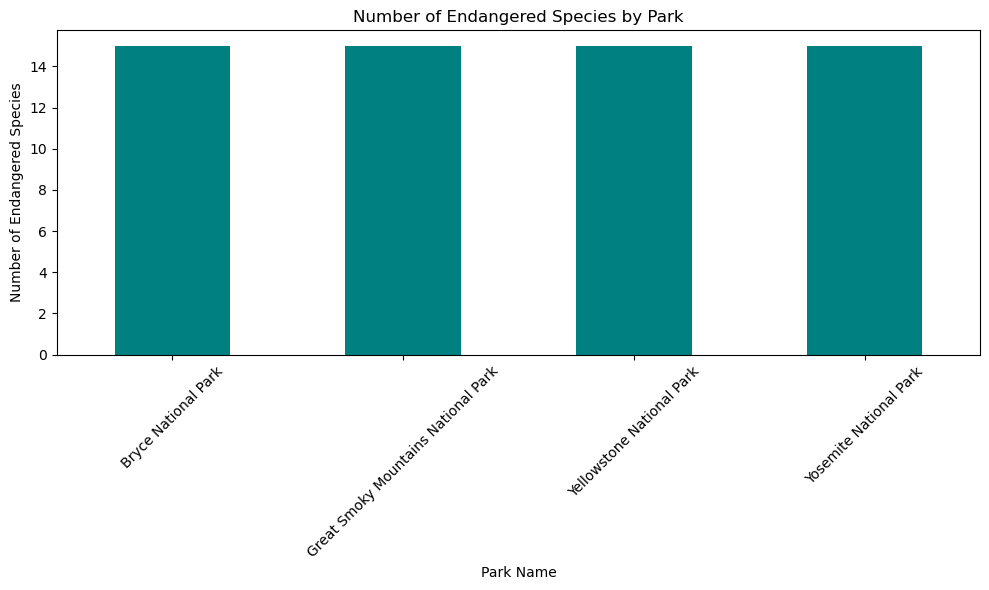

park_name
Bryce National Park                    15
Great Smoky Mountains National Park    15
Yellowstone National Park              15
Yosemite National Park                 15
Name: scientific_name, dtype: int64

In [36]:
# Correlation analysis: Endangered Species Distribution by Park

# Merge the cleaned datasets to associate species with their observations in parks
species_park_data = observations_cleaned.merge(species_info_cleaned, on='scientific_name')

# Filter for endangered species
endangered_species_in_parks = species_park_data[species_park_data['conservation_status'] == 'Endangered']

# Count the number of unique endangered species observed in each park
endangered_species_count_by_park = endangered_species_in_parks.groupby('park_name')['scientific_name'].nunique()

# Visualize the number of endangered species per park
plt.figure(figsize=(10, 6))
endangered_species_count_by_park.plot(kind='bar', color='teal')
plt.title('Number of Endangered Species by Park')
plt.xlabel('Park Name')
plt.ylabel('Number of Endangered Species')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Return the park-wise endangered species count for further inspection
endangered_species_count_by_park

## Findings: Endangered Species Distribution by Park

* #### Each park—Bryce National Park, Great Smoky Mountains National Park, Yellowstone National Park, and Yosemite National Park—has exactly 15 endangered species observed.

### Key Observations:
* The uniform distribution suggests that the number of endangered species recorded might be influenced by factors like survey effort or park management priorities, rather than purely ecological conditions.
* Further analysis could investigate whether these species differ significantly across parks, or if there are common endangered species shared between them.

In [40]:
# Identify common endangered species across the parks

# Group endangered species data by park and list species observed in each park
endangered_species_by_park = endangered_species_in_parks.groupby('park_name')['scientific_name'].unique()

# Find the intersection of species observed across all parks
common_endangered_species = set(endangered_species_by_park.iloc[0])
for species_list in endangered_species_by_park[1:]:
    common_endangered_species.intersection_update(species_list)

# Display the common endangered species
common_endangered_species

{'Canis lupus',
 'Canis rufus',
 'Chasmistes liorus',
 'Etheostoma percnurum',
 'Geum radiatum',
 'Glaucomys sabrinus coloratus',
 'Grus americana',
 'Gymnogyps californianus',
 'Myotis grisescens',
 'Myotis sodalis',
 'Noturus baileyi',
 'Ovis canadensis sierrae',
 'Picoides borealis',
 'Rana sierrae',
 'Vermivora bachmanii'}

### Common Endangered Species Across Parks
#### The following endangered species are observed in all four parks:

* Canis lupus (Gray Wolf)
* Canis rufus (Red Wolf)
* Chasmistes liorus (June Sucker)
* Etheostoma percnurum (Duskytail Darter)
* Geum radiatum (Spreading Avens)
* Glaucomys sabrinus coloratus (Carolina Northern Flying Squirrel)
* Grus americana (Whooping Crane)
* Gymnogyps californianus (California Condor)
* Myotis grisescens (Gray Bat)
* Myotis sodalis (Indiana Bat)
* Noturus baileyi (Smoky Madtom)
* Ovis canadensis sierrae (Sierra Nevada Bighorn Sheep)
* Picoides borealis (Red-cockaded Woodpecker)
* Rana sierrae (Sierra Nevada Yellow-legged Frog)
* Vermivora bachmanii (Bachman's Warbler)

#### Key Insights:
* These species span a range of taxonomic groups, including mammals, birds, amphibians, and fish.
* Some species, like the Gray Wolf and Whooping Crane, are well-known for their historical conservation efforts, indicating ongoing protection and monitoring.
* The presence of species like California Condor and Sierra Nevada Bighorn Sheep suggests the parks play a critical role in preserving populations with very limited distributions.

#### Lessons Learned
* Species Risk Patterns: Amphibians, mammals, and birds tend to have higher proportions of at-risk species, reflecting the need for targeted conservation measures based on taxonomic and ecological factors.
* Parks as Biodiversity Hotspots: Each park supports unique endangered species, but the commonality among some species highlights the interconnected nature of habitat protection efforts across regions.
* Data Limitations and Consistency: The identical number of endangered species per park suggests a need for further investigation into survey methods and classification criteria to ensure consistency in future studies.

#### Reflection
The results were both surprising and expected. While I anticipated that mammals and amphibians would show elevated risk levels, the uniform count of endangered species across parks was unexpected. Additionally, identifying a core group of shared endangered species suggests the potential for collaborative conservation strategies between parks.

#### Takeaways
* National parks play a crucial role in the protection of endangered species, providing critical habitats for a wide range of taxa.
* Conservation strategies should be tailored to the specific needs of high-risk groups like amphibians and mammals, as well as region-specific threats faced by park ecosystems.
* Improved data collection and monitoring efforts are essential for accurately tracking the status of endangered species over time.
* This analysis offers a solid foundation for future research and policy development aimed at safeguarding biodiversity within the National Park system.